# Install Dependencies

In [93]:
!python -m pip install prettytable

# Import Dependencies

EPS: 8.33, EPS Next 5 Years: 0.5189%, P/E Ratio: 83.16499999999999, Current Price: $ 925.9
Intrinsic Value: $ 532.8957307692306 vs. Current Price: $ 925.9
EPS: 6.05, EPS Next 5 Years: 0.0983%, P/E Ratio: 26.525, Current Price: $ 165.81
Intrinsic Value: $ 123.44326923076925 vs. Current Price: $ 165.81
EPS: 2.0, EPS Next 5 Years: 0.3%, P/E Ratio: 36.175000000000004, Current Price: $ 12.37
Intrinsic Value: $ 55.65384615384618 vs. Current Price: $ 12.37
EPS: 7.15, EPS Next 5 Years: 0.004%, P/E Ratio: 17.14, Current Price: $ 148.12
Intrinsic Value: $ 94.27000000000001 vs. Current Price: $ 148.12
EPS: 1.12, EPS Next 5 Years: 0.12%, P/E Ratio: 41.485, Current Price: $ 62.46
Intrinsic Value: $ 35.74092307692308 vs. Current Price: $ 62.46
EPS: 4.81, EPS Next 5 Years: 0.11%, P/E Ratio: 23.115000000000002, Current Price: $ 109.72
Intrinsic Value: $ 85.5255 vs. Current Price: $ 109.72
EPS: 6.97, EPS Next 5 Years: 0.0017000000000000001%, P/E Ratio: 15.765, Current Price: $ 138.92
Intrinsic Value: $

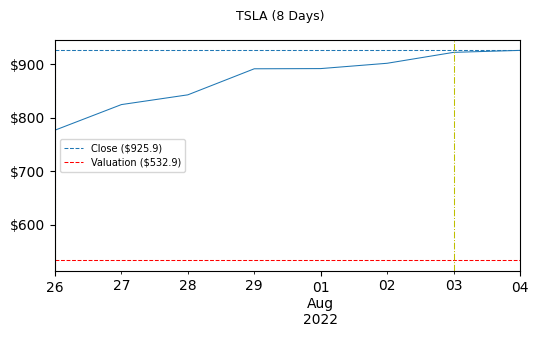

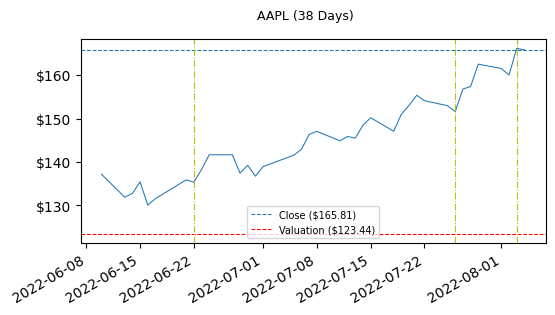

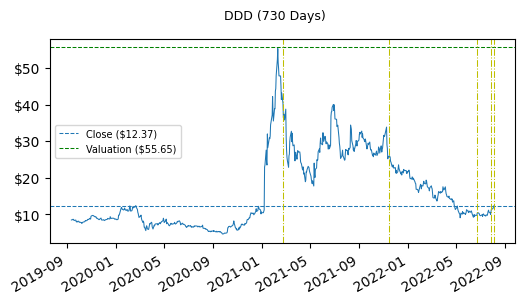

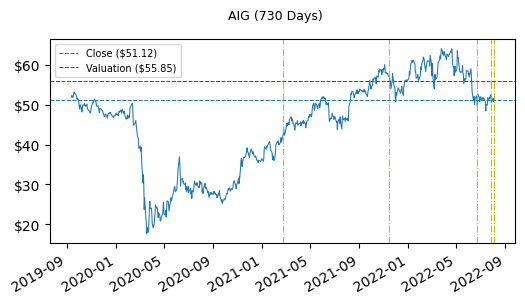

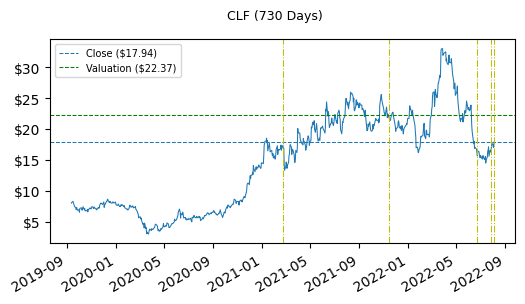

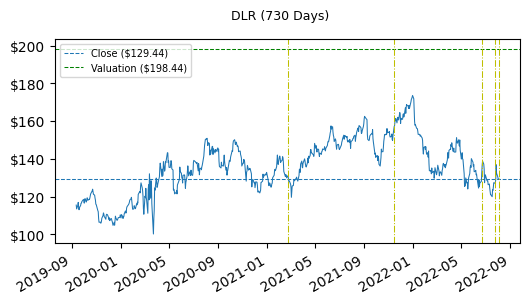

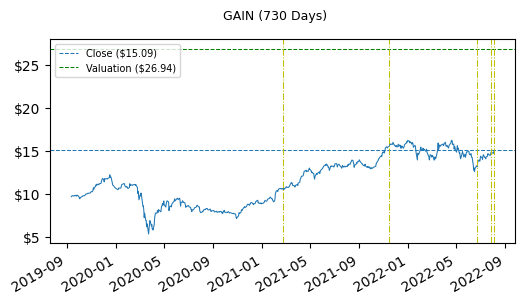

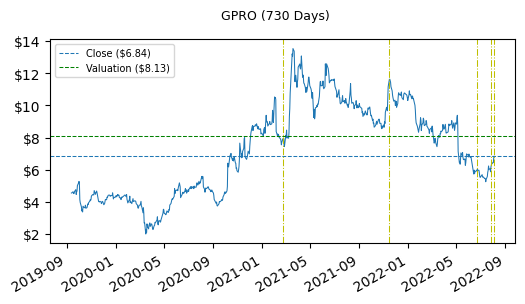

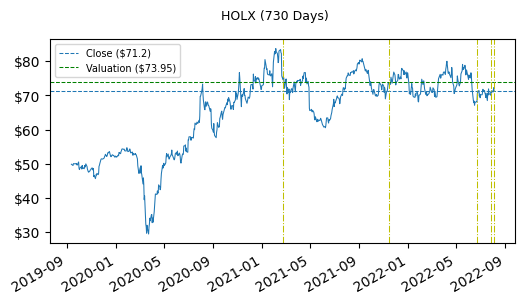

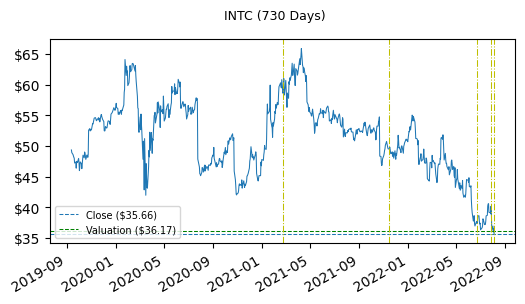

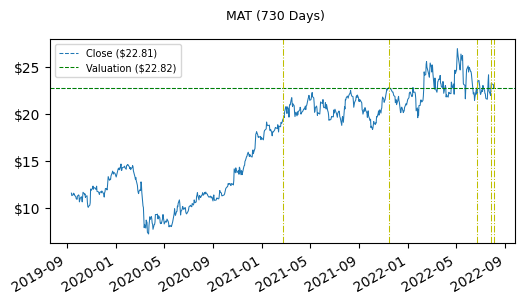

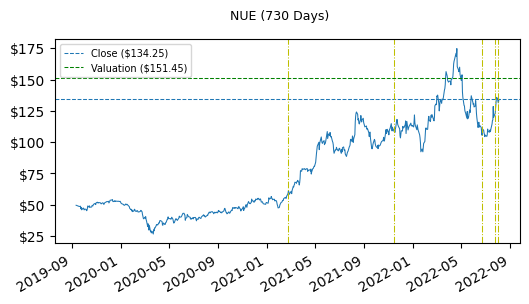

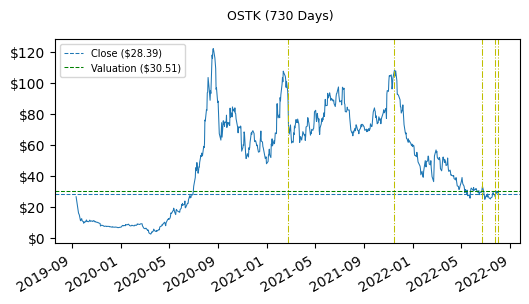

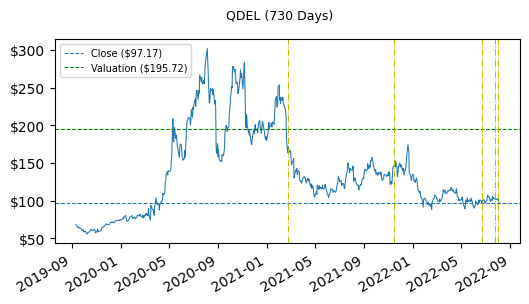

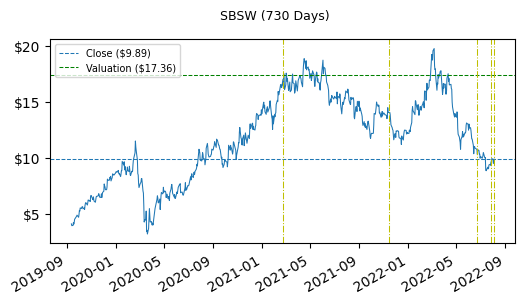

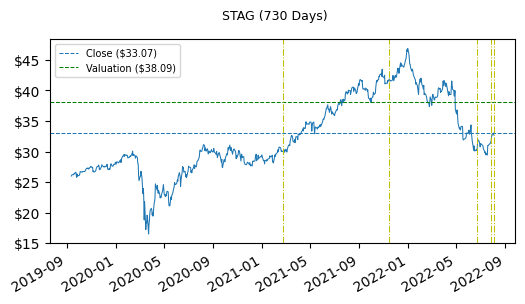

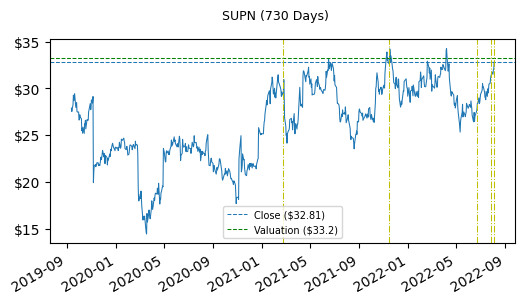

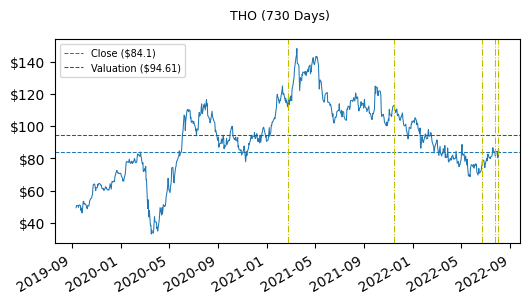

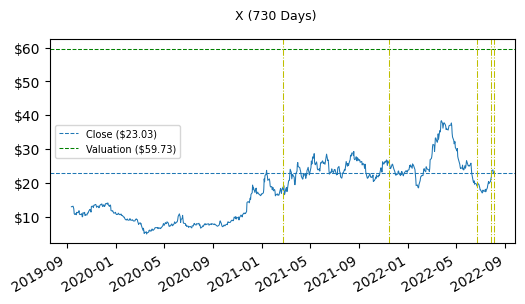

In [94]:
%run ./../asset_valuation/finviz_asset_valuation.ipynb

In [95]:
%run ./../../utilities/communication/telegram.ipynb

In [96]:
from telegram.ext import Dispatcher, CommandHandler, MessageHandler, Filters, InlineQueryHandler
from telegram import Update, InlineQueryResultArticle, InputTextMessageContent, ParseMode
from telegram.ext import CallbackContext
import prettytable as pt
import pandas as pd

# Bot Usage

## Config

In [97]:
bot_token = '5535601062:AAGpXCCTWa8OBajV3AeTPrmIOIFjPi_H3p8'

## Message Handlers

In [98]:
def info_handler(update: Update, context: CallbackContext):
    chat_id = update.effective_chat.id

    context.bot.send_message(chat_id=chat_id, 
                             text=f'Chat Id: {chat_id}\n\nFrostAura Consolidated')

def text_handler(update: Update, context: CallbackContext):
    context.bot.send_message(chat_id=update.effective_chat.id, text=update.message.text)

def inline_caps(update: Update, context: CallbackContext):
    query = update.inline_query.query

    if not query:
        return

    results = []
    results.append(
        InlineQueryResultArticle(
            id=query.upper(),
            title='Caps',
            input_message_content=InputTextMessageContent(query.upper())
        )
    )
    context.bot.answer_inline_query(update.inline_query.id, results)

def handlers_registration(dispatcher: Dispatcher):
    print('Registering dispatchers.')

    start_handler = CommandHandler('info', info_handler)
    dispatcher.add_handler(start_handler)
    
    text_message_handler = MessageHandler(Filters.text & (~Filters.command), text_handler)
    dispatcher.add_handler(text_message_handler)

    inline_caps_handler = InlineQueryHandler(inline_caps)
    dispatcher.add_handler(inline_caps_handler)

In [99]:
data = {
    'Column 1': [
        'Col 1 row 1',
        'Col 1 row 2'
    ],
    'Column 2': [
        'Col 2 row 1',
        'Col 2 row 2'
    ]
}
dataframe = pd.DataFrame(data)

In [100]:
with TelegramBot(bot_token=bot_token, register_handlers=handlers_registration) as context:
    #context.bot.send_message(chat_id='1551490751', text="`Dynamic message here...`")
    #context.bot.send_message(chat_id='1551490751', text='<b>Example message</b> where the previous is bold...', parse_mode=ParseMode.HTML)
    #context.send_dataframe(chat_id='1551490751', dataframe=dataframe)
    for plot in owned_plots + available_plots:
        context.send_figure(chat_id='1551490751', figure=plot.get_figure())

Registering dispatchers.
